In [1]:
import pickle
!pip install D:\programming\bachelor_projects\NEASE

Processing d:\programming\bachelor_projects\nease
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for nease: filename=nease-1.2.2-py3-none-any.whl size=39880114 sha256=d2b796ace576bcd23eba35dd80088034e9b055ff7d7a99cc84961eeab85d046d
  Stored in directory: C:\Users\gooog\AppData\Local\Temp\pip-ephem-wheel-cache-iatcwvwe\wheels\75\16\f4\c11f2a1a7fe2201b9b7691cb0c6e480fd2ac42e5495345b174
Successfully built nease



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import nease
import pandas as pd

In [3]:
# Diff spliced events in Multiple sclerosis (MS)
# please change file accordinally

table=pd.read_table('../data_nease/AL_NAWM.deltapsi.tsv')

In [4]:
# Run nease with majiq
# "D:/programming/bachelor_projects/NEASE/nease/data/"
events=nease.run(table, organism='Human',input_type='MAJIQ', only_DDIs=False, human_network='data\\network\graph_human_ext_random', node_degree=65650)
# for the extended: 66220
# for the random: 65650
# for the bronze: 65659
# for the gold_silver: 60724
# original: 60235

Processing MAJIQ format...
MAJIQ output converted successfully to NEASE format.

		Data Summary
**************************************************
19 protein domains are affected by AS.

1 linear motifs are affected by AS.
6 interacting resiude are affected by AS.

14 of the affected domains/motifs have known interactions.
115 protein interactions/binding affected.

**************************************************
Running enrichment analysis...
Degree of PPI/DDI network: 65650


C:\Users\gooog\miniconda3\lib\site-packages\nease\functions.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interacting_domains=interacting_domains[['Gene name','NCBI gene ID','Identifier','dPSI','Affected binding (NCBI)']].append(elm_affected, ignore_index=True)


NEASE enrichment done.


In [5]:
# Run on KEGG gene set
enr=events.classic_enrich(gseapy_databases=['Reactome_2016']).head(10)
enr

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 27 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'P', 'R', 'a', 'c', 'd', 'e', 'hyphen', 'j', 'l', 'm', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 's', 'six', 'space', 't', 'two', 'u', 'underscore', 'v', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 19, 20, 21, 25, 36, 51, 53, 66, 68, 70, 71, 72, 77, 79, 80, 82, 86, 87, 88, 89]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 27 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'P', 'R', 'a

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2016,Muscle contraction Homo sapiens R-HSA-397014,9/196,0.000001,0.000506,0,0,9.483209,128.739408,CAMK2D;TPM2;CACNA2D1;TPM1;ATP2B4;DMD;CACNA1C;ATP2B1;SLC8A1
1,Reactome_2016,Reduction of cytosolic Ca++ levels Homo sapiens R-HSA-418359,3/12,0.000033,0.005953,0,0,62.522013,644.367346,ATP2B4;ATP2B1;SLC8A1
2,Reactome_2016,Activation of NMDA receptor upon glutamate binding and postsynaptic events Homo sapiens R-HSA-442755,4/39,0.000059,0.005953,0,0,21.611973,210.358328,GRIA1;CAMK2D;BRAF;GRIN1
3,Reactome_2016,Cardiac conduction Homo sapiens R-HSA-5576891,6/135,0.000097,0.005953,0,0,8.923911,82.468696,CAMK2D;CACNA2D1;ATP2B4;CACNA1C;ATP2B1;SLC8A1
4,Reactome_2016,Membrane Trafficking Homo sapiens R-HSA-199991,10/420,0.000100,0.005953,0,0,4.799458,44.183420,GRIA1;GOLGA2;C2CD5;TSG101;TFG;KIF3A;AP1B1;DTNBP1;MIA3;BICD1
5,Reactome_2016,"Unblocking of NMDA receptor, glutamate binding and activation Homo sapiens R-HSA-438066",3/17,0.000101,0.005953,0,0,40.182615,369.585221,GRIA1;CAMK2D;GRIN1
6,Reactome_2016,NRAGE signals death through JNK Homo sapiens R-HSA-193648,4/45,0.000105,0.005953,0,0,18.443670,169.025198,ARHGEF11;MCF2L;ARHGEF3;ARHGEF7
7,Reactome_2016,Ion homeostasis Homo sapiens R-HSA-5578775,4/51,0.000171,0.007790,0,0,16.084296,139.488727,CAMK2D;ATP2B4;ATP2B1;SLC8A1
8,Reactome_2016,Signalling by NGF Homo sapiens R-HSA-166520,10/450,0.000176,0.007790,0,0,4.465335,38.599100,ARHGEF11;CAMK2D;MCF2L;AKT3;ARHGEF3;RAPGEF2;BRAF;ARHGEF7;DUSP16;GRIN1
9,Reactome_2016,SALM protein interactions at the synapse Homo sapiens R-HSA-8849932,3/22,0.000225,0.008949,0,0,29.600794,248.647657,GRIA1;DLG3;GRIN1


In [ ]:
# Get list of all protein domais affected by AS.
# A link to DIGGER database for lost/gained domain and their binding.


In [ ]:
# get the affected linear motifs
events.get_elm()

In [ ]:
# get interacting residues affected by AS
events.get_pdb()

In [5]:
# Run nease enrichment on affected edges
nease_enr=events.enrich(database=['KEGG'])
nease_enr.head(10)

NEASE enrichment for the pathway databases:
 ['KEGG']
Found 9 enriched pathways after multiple testing correction.



,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
0,path:hsa04720,Long-term potentiation - Homo sapiens (human),KEGG,"GRIA1 (1), MYH10 (2), ATP2B1 (3), BRAF (3), MAP2K4 (1), SYNE1 (1)",0.000150,0.012487,7.649707
1,path:hsa04740,Olfactory transduction - Homo sapiens (human),KEGG,"MYH10 (1), ATP2B1 (3), MAP2K4 (1), SYNE1 (1)",0.000055,0.012487,7.379590
2,path:hsa04024,cAMP signaling pathway - Homo sapiens (human),KEGG,"GRIA1 (1), MYH10 (2), ATP2B1 (3), BRAF (4), MAP2K4 (1), SYNE1 (1)",0.000575,0.029411,5.612387
3,path:hsa04722,Neurotrophin signaling pathway - Homo sapiens (human),KEGG,"MYH10 (2), ATP2B1 (3), BRAF (2), LRRC6 (1), MAP2K4 (2), SYNE1 (1), SNRPA1 (4)",0.000656,0.029411,5.513208
4,path:hsa05031,Amphetamine addiction - Homo sapiens (human),KEGG,"GRIA1 (1), MYH10 (1), ATP2B1 (3), BRAF (1), MAP2K4 (1), SYNE1 (1)",0.000153,0.012487,5.396090
5,path:hsa04925,Aldosterone synthesis and secretion - Homo sapiens (human),KEGG,"MYH10 (1), ATP2B1 (3), BRAF (1), MAP2K4 (1), SYNE1 (1)",0.000156,0.012487,5.383408
6,path:hsa04916,Melanogenesis - Homo sapiens (human),KEGG,"MYH10 (2), ATP2B1 (3), BRAF (1), MAP2K4 (1), SYNE1 (1), SNRPA1 (1)",0.002661,0.059655,4.459817
7,path:hsa04270,Vascular smooth muscle contraction - Homo sapiens (human),KEGG,"GRIA1 (1), MYH10 (1), ATP2B1 (3), BRAF (3)",0.000732,0.029411,4.433978
8,path:hsa04971,Gastric acid secretion - Homo sapiens (human),KEGG,"MYH10 (1), ATP2B1 (3), MAP2K4 (1), SYNE1 (1)",0.000735,0.029411,4.431511
9,path:hsa04921,Oxytocin signaling pathway - Homo sapiens (human),KEGG,"MYH10 (2), ATP2B1 (3), BRAF (2), MAP2K4 (2), SYNE1 (1), SNRPA1 (1)",0.001250,0.044450,4.105517


In [6]:
# Run nease enrichment on affected edges
nease_enr=events.enrich(database=['Reactome'])
# pickle.dump(nease_enr, open('data_nease/random_nease_enr_ext.pkl', 'wb'))
nease_enr.head(10)

NEASE enrichment for the pathway databases:
 ['Reactome']
Found 1 enriched pathways after multiple testing correction.



,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
0,R-HSA-5576892,Phase 0 - rapid depolarisation,Reactome,"MYH10 (1), ATP2B1 (1), BRAF (1), MAP2K4 (1), SYNE1 (1)",0.000010,0.018012,9.976948
1,R-HSA-936837,Ion transport by P-type ATPases,Reactome,"MYH10 (1), ATP2B1 (1), MAP2K4 (1), SYNE1 (1)",0.000212,0.131573,6.361276
2,R-HSA-438066,"Unblocking of NMDA receptor, glutamate binding and activation",Reactome,"GRIA1 (1), MYH10 (1), MAP2K4 (1), SYNE1 (1)",0.000225,0.131573,6.318073
3,R-HSA-442729,CREB phosphorylation through the activation of CaMKII,Reactome,"MYH10 (1), ATP2B1 (1), MAP2K4 (1), SYNE1 (1)",0.000506,0.177647,5.707975
4,R-HSA-5578775,Ion homeostasis,Reactome,"MYH10 (1), ATP2B1 (1), MAP2K4 (1), SYNE1 (1)",0.001468,0.367894,4.907261
5,R-HSA-5210891,Uptake and function of anthrax toxins,Reactome,"MYH10 (1), ATP2B1 (1), BRAF (1), MAP2K4 (1)",0.000356,0.156160,4.876774
6,R-HSA-442982,Ras activation upon Ca2+ influx through NMDA receptor,Reactome,"MYH10 (1), ATP2B1 (1), MAP2K4 (1), SYNE1 (1)",0.002277,0.399337,4.577273
7,R-HSA-5339562,Uptake and actions of bacterial toxins,Reactome,"MYH10 (1), ATP2B1 (1), BRAF (1), MAP2K4 (1)",0.001319,0.367894,4.072793
8,R-HSA-399721,"Glutamate binding, activation of AMPA receptors and synaptic plasticity",Reactome,"GRIA1 (1), MYH10 (1), MAP2K4 (1), SYNE1 (1)",0.005992,0.764800,3.849388
9,R-HSA-399719,Trafficking of AMPA receptors,Reactome,"GRIA1 (1), MYH10 (1), MAP2K4 (1), SYNE1 (1)",0.005992,0.764800,3.849388


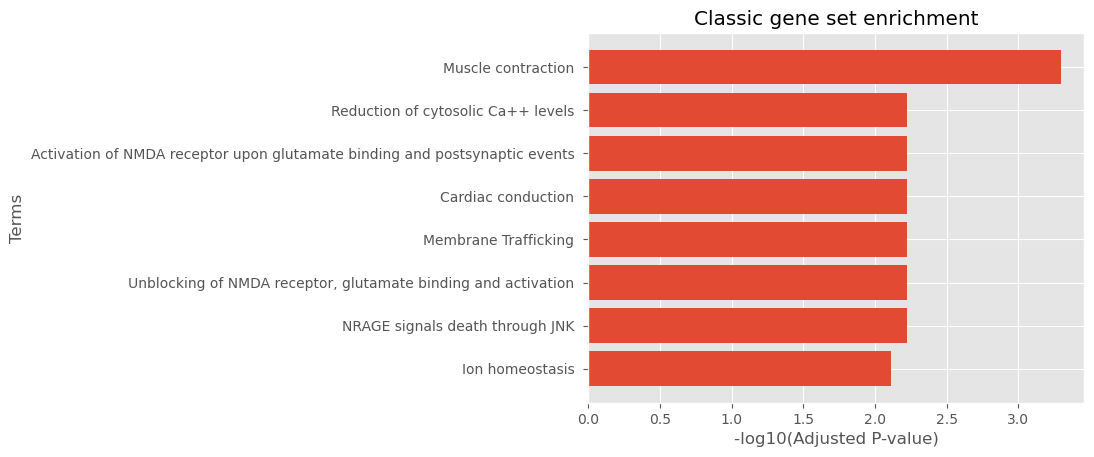

In [14]:
import numpy as np
import matplotlib.pyplot as plt

Term = enr['Term'][:8]
Term = [x.split('Homo')[0] for x in Term]
Pvalues =enr['Adjusted P-value'][:8]
Pvalues=[ -np.log10(x) for x in Pvalues]
plt.style.use('ggplot')

plt.barh(Term[::-1],Pvalues[::-1] )
plt.title('Classic gene set enrichment')
plt.ylabel('Terms')
plt.xlabel('-log10(Adjusted P-value)')
#plt.savefig('AS data/Platelet/classic_enr',format='pdf',bbox_inches='tight')

plt.show()

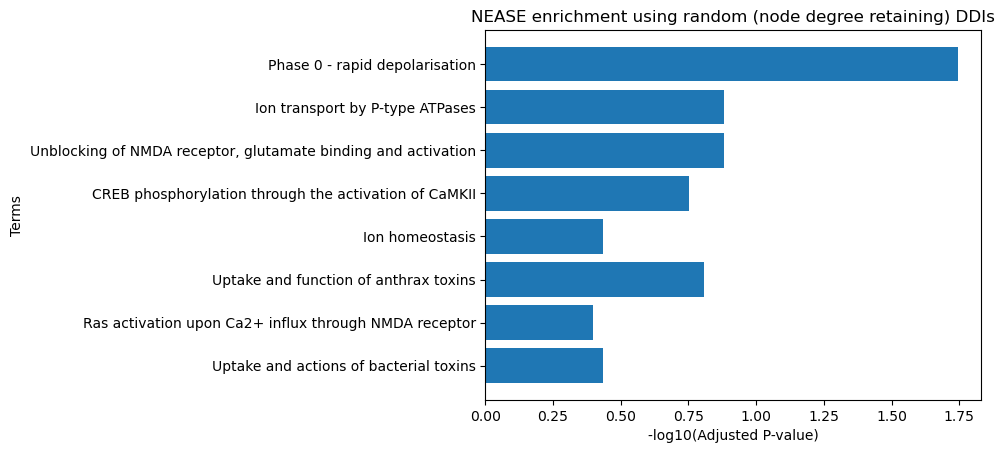

In [7]:
import numpy as np
import matplotlib.pyplot as plt
nease_enr=nease_enr.sort_values(by='Nease score',ascending=False)
Term = nease_enr['Pathway name'][:8]
Pvalues =nease_enr['adj p_value'][:8]
Pvalues=[ -np.log10(x) for x in Pvalues]

plt.barh(Term[::-1],Pvalues[::-1])
plt.title('NEASE enrichment using random (node degree retaining) DDIs')
plt.ylabel('Terms')
plt.xlabel('-log10(Adjusted P-value)')
plt.savefig('../data_nease/nease_enrichment_ext_random.png',bbox_inches='tight')
plt.show()

In [17]:
events.path_analysis('R-HSA-6794361')

Enrichment of the pathway: Neurexins and neuroligins.

Overall p_value:  5.232157413669317e-16




,Spliced genes,NCBI gene ID,Gene is known to be in the pathway,Percentage of edges associated to the pathway,p_value,Affected binding (edges),Affected binding (NCBI)
0,GRIN1,2902,True,19/123,9.640193e-23,"GRIN2A,LRRTM4,GRIN2C,DLGAP4,DLG4,DLG3,GRIN2B,DLG2,LIN7A,HOMER1,GRIN1,GRM5,LRRTM3,LRRTM2,DLGAP1,CASK,GRIN2D,DLGAP2,HOMER2","2903,80059,2905,22839,1742,1741,2904,1740,8825,9456,2902,2915,347731,26045,9229,8573,2906,9228,9455"
1,GRIA1,2890,False,2/14,2.208544e-03,"EPB41L1,EPB41L2","2036,2037"
2,DMD,1756,False,3/114,2.017887e-02,"DLG3,DLG2,CASK","1741,1740,8573"
3,MYH10,4628,False,1/33,1.533272e-01,EPB41,2035
4,SYNE1,23345,False,1/94,3.776327e-01,DLG2,1740
5,BRAF,673,False,1/176,5.886100e-01,GRIN1,2902


In [18]:
events.path_analysis('R-HSA-5683057')

Enrichment of the pathway: MAPK family signaling cascades.

Overall p_value:  6.939497170746202e-08




,Spliced genes,NCBI gene ID,Gene is known to be in the pathway,Percentage of edges associated to the pathway,p_value,Affected binding (edges),Affected binding (NCBI)
0,BRAF,673,True,56/176,4.790315e-22,"RAP1B,FGFR4,JAK3,NRAS,MAPK6,IQGAP1,RAF1,JAK2,JAK1,CDK1,MAP2K2,CAMK2B,MAPK4,MET,CAMK2D,FGFR3,PRKACB,PRKACG,RET,BRAF,ERBB4,KIT,GRIN1,PAK1,FGF9,FGF2,EGFR,RAP1A,PAK2,SHC1,HRAS,FGFR2,MAP2K1,MAPK3,CSK,PDGFRA,CAMK2G,PDGFRB,FYN,CAMK2A,PTPN11,ERBB2,PRKACA,MAPK1,KSR1,FGF20,CNKSR2,ERBB3,KSR2,KRAS,SHC2,PAK3,ARAF,FGFR1,YWHAB,SHC3","5908,2264,3718,4893,5597,8826,5894,3717,3716,983,5605,816,5596,4233,817,2261,5567,5568,5979,673,2066,3815,2902,5058,2254,2247,1956,5906,5062,6464,3265,2263,5604,5595,1445,5156,818,5159,2534,815,5781,2064,5566,5594,8844,26281,22866,2065,283455,3845,25759,5063,369,2260,7529,53358"
1,GRIN1,2902,True,14/123,5.794176e-02,"GRIN2A,RAF1,GRIN2C,SPTAN1,DLG4,GRIN2B,ERBB4,BRAF,GRIN1,PPP5C,PTK2,CAMK2G,FYN,GRIN2D","2903,5894,2905,6709,1742,2904,2066,673,2902,5536,5747,818,2534,2906"
2,MYH10,4628,False,5/33,8.412623e-02,"PAK2,SHC1,IQGAP1,CDC42,GRB2","5062,6464,8826,998,2885"
3,MAP2K4,6416,False,5/34,9.309261e-02,"JUN,MAPK1,UBC,EGFR,MAP3K11","3725,5594,7316,1956,4296"
4,ATP2B1,490,False,1/5,3.106914e-01,CALM1,801
5,SLC25A25,114789,False,2/30,6.441481e-01,"SPTAN1,DUSP1","6709,1843"
6,DMD,1756,False,4/114,9.671303e-01,"IQGAP1,VCL,CSK,FYN","8826,7414,1445,2534"
7,SYNE1,23345,False,2/94,9.924423e-01,"IQGAP1,VCL","8826,7414"
